# Analyse des fréquences et du contexte d'apparition des mots 

In [59]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import numpy as np
import plotly.express as px 
import spacy
from spacy import displacy
from nltk.probability import FreqDist
import plotly.express as px
from wordcloud import ImageColorGenerator
from PIL import Image
from nltk.text import Text
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from spacy import displacy

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ambre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ambre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ambre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Importation des données 

### Base de données "now"

In [70]:
df_now = pd.read_csv("C:/Users/Ambre/Downloads/ProjetTextMining-dev/ProjetTextMining-dev/data_chatgpt_now.csv")


mots_now = []

for element in df_now['Tweet']:
    if isinstance(element, str):
        mots_now.extend(element.split())

# Liste de tous les mots de la base de données pré-traitée 
#print(mots_now) 

### Base de données "before"

In [69]:
df_before = pd.read_csv("C:/Users/Ambre/Downloads/ProjetTextMining-dev/ProjetTextMining-dev/data_chatgpt_before.csv")


mots_before = []

for element in df_before['Tweet']:
    if isinstance(element, str):
        mots_before.extend(element.split())

# Liste de tous les mots de la base de données pré-traitée 
#print(mots_now) 

## Nuage de mots => version finale : Tangi

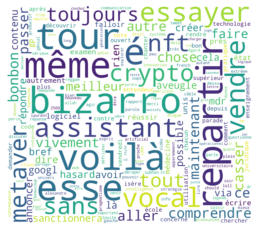

In [13]:
tokens_now = mots_now.copy()
tokens_before = mo

mask = np.array(Image.open("C:/Users/Ambre/Downloads/ProjetTextMining-dev/ProjetTextMining-dev/twi5.png"))
wordcloud = WordCloud(mask=mask, background_color="white", color_func = None).generate_from_frequencies(dict(zip(tokens, [1]*len(tokens))))
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## Graphique des dépendances 

On réalise le graphique des dépendances sur seulement 1000 mots => ça fait planter jupyter si on fait sur tous les mots 

### "now"

In [72]:
#nlp = spacy.load("fr_core_news_sm", max_length=2000000)
nlp = spacy.load("fr_core_news_sm")
nlp.max_length = 2000000
chaine = " ".join(mots_now[1:1000])
doc = nlp(chaine)
print(displacy.render(doc, style='dep', jupyter=True, options={'distance': 130}))

None


### "before"

In [73]:
nlp = spacy.load("fr_core_news_sm")
nlp.max_length = 2000000
chaine = " ".join(mots_before[1:1000])
doc = nlp(chaine)
print(displacy.render(doc, style='dep', jupyter=True, options={'distance': 130}))

None


## Analyse des fréquences 

### "now"

[('avoir', 3566), ('faire', 2307), ('googl', 2284), ('ia', 1922), ('plus', 1755), ('pouvoir', 1526), ('cela', 1338), ('aller', 1281), ('tout', 1239), ('bard', 1093)]


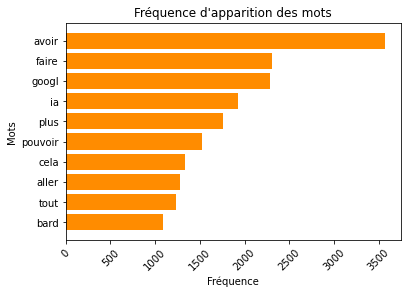

[('avoir', 3566), ('faire', 2307), ('googl', 2284), ('ia', 1922), ('plus', 1755), ('pouvoir', 1526), ('cela', 1338), ('aller', 1281), ('tout', 1239), ('bard', 1093), ('via', 1036), ('intelligence', 1028), ('artificiel', 955), ('microsoft', 954), ('réponse', 902), ('si', 820), ('comme', 817), ('openai', 782), ('lancer', 777), ('nouveau', 766), ('utiliser', 758), ('outil', 758), ('bing', 751), ('recherche', 738), ('être', 685), ('dire', 634), ('écrire', 628), ('ce', 621), ('voir', 611), ('comment', 601)]


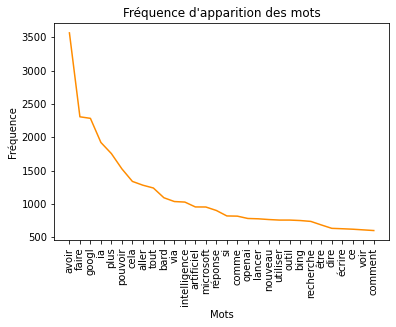

In [74]:
# Comptage de la fréquence d'apparition des mots
word_counts = nltk.FreqDist(mots_now)

# Afficher les 10 mots les plus fréquents
print(word_counts.most_common(10))
top_10 = word_counts.most_common(10)

# Graphique des fréquences 
plt.barh(list(zip(*top_10))[0], list(zip(*top_10))[1], color = "darkorange")
plt.title("Fréquence d'apparition des mots")
plt.xlabel("Fréquence")
plt.ylabel("Mots")
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

# Exportation du graphique
#plt.savefig('graphique1.png')

# Afficher les 30 mots les plus fréquents 
print(word_counts.most_common(30))
top_30 = word_counts.most_common(30)

# Graphique : fréquence d'apparition des 30 mots les plus fréquents 
plt.plot(list(zip(*top_30))[0], list(zip(*top_30))[1], color = "darkorange")
plt.title("Fréquence d'apparition des mots")
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.xticks(rotation=90)
#plt.show()

# Exportation du graphique
#plt.savefig('graphique2.jpg')

fig = px.bar(x = list(zip(*top_30))[0], y = list(zip(*top_30))[1], title = "Fréquence d'apparition des 30 mots les plus fréquents", labels = dict(x = "Mots", y = "Fréquence d'apparition"), color_discrete_sequence = ["#22DEEE"])
#fig.show()

fig = px.line(x = list(zip(*top_30))[0], y = list(zip(*top_30))[1], title = "Fréquence d'apparition des 30 mots les plus fréquents", labels = dict(x = "Mots", y = "Fréquence d'apparition"), color_discrete_sequence = ["#22DEEE"])
#fig.show()

### "before"

[('avoir', 1393), ('faire', 1021), ('ia', 846), ('pouvoir', 749), ('tout', 734), ('aller', 659), ('cela', 657), ('plus', 550), ('intelligence', 449), ('question', 431)]


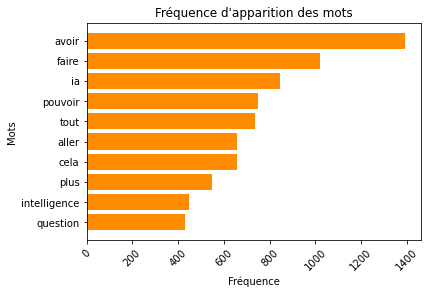

[('avoir', 1393), ('faire', 1021), ('ia', 846), ('pouvoir', 749), ('tout', 734), ('aller', 659), ('cela', 657), ('plus', 550), ('intelligence', 449), ('question', 431), ('réponse', 426), ('artificiel', 425), ('écrire', 406), ('si', 387), ('ce', 370), ('demander', 367), ('nouveau', 361), ('openai', 359), ('comme', 338), ('bon', 291), ('voir', 284), ('savoir', 284), ('bien', 280), ('tester', 280), ('comment', 275), ('dire', 272), ('très', 269), ('aussi', 267), ('être', 267), ('via', 258)]


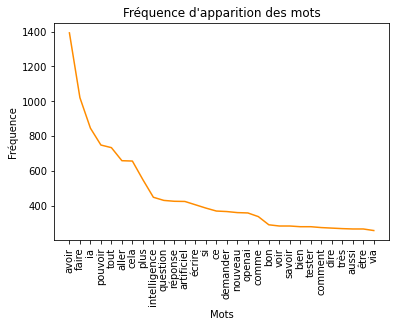

In [77]:
# Comptage de la fréquence d'apparition des mots
word_counts = nltk.FreqDist(mots_before)

# Afficher les 10 mots les plus fréquents
print(word_counts.most_common(10))
top_10 = word_counts.most_common(10)

# Graphique des fréquences 
plt.barh(list(zip(*top_10))[0], list(zip(*top_10))[1], color = "darkorange")
plt.title("Fréquence d'apparition des mots")
plt.xlabel("Fréquence")
plt.ylabel("Mots")
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

# Exportation du graphique
#plt.savefig('graphique1.png')

# Afficher les 30 mots les plus fréquents 
print(word_counts.most_common(30))
top_30 = word_counts.most_common(30)

# Graphique : fréquence d'apparition des 30 mots les plus fréquents 
plt.plot(list(zip(*top_30))[0], list(zip(*top_30))[1], color = "darkorange")
plt.title("Fréquence d'apparition des mots")
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.xticks(rotation=90)
plt.show()

# Exportation du graphique
#plt.savefig('graphique2.jpg')

fig = px.bar(x = list(zip(*top_30))[0], y = list(zip(*top_30))[1], title = "Fréquence d'apparition des 30 mots les plus fréquents", labels = dict(x = "Mots", y = "Fréquence d'apparition"), color_discrete_sequence = ["#22DEEE"])
#fig.show()

fig = px.line(x = list(zip(*top_30))[0], y = list(zip(*top_30))[1], title = "Fréquence d'apparition des 30 mots les plus fréquents", labels = dict(x = "Mots", y = "Fréquence d'apparition"), color_discrete_sequence = ["#22DEEE"])
#fig.show()

## Contexte d'apparition des mots => A faier avec tweets non tokenisés 

### "now"

In [80]:
# Importation des données 
df_phrases_now = pd.read_csv("C:/Users/Ambre/Downloads/ProjetTextMining-dev/ProjetTextMining-dev/data_chatgpt_now_phrase.csv")

phrases_now = []

for element in df_phrases_now['Tweet']:
    if isinstance(element, str):
        phrases_now.extend(element.split())

In [88]:
contexte = Text(phrases_now)
contexte.concordance("innovation") # renvoie resultats similaires à ceux du poly 

Displaying 25 of 41 matches:
ificielle ChatGPT en examen : une innovation qui questionne le système univers
Microsoft sur ChatGPT et Bing l ' innovation qui bouscule le monde de la Tech 
nt quand même important ." 🎙️ l ' innovation qui bouscule le monde de la Tech 
ificielle ChatGPT en examen : une innovation qui questionne le système univers
er dîner - débat 2023 avec hier ! Innovation , intelligence artificielle et ét
 imbriquer la régulation avec l ’ innovation ". invité de dans et : ne confiez
ution ou un robot à " bullshit "? Innovation – ChatGPT atteint 100 millions d 
’ est à dire la créativité ou l ’ innovation ." L ' dit oui à ! Pour Thierry B
e dis 😭 Dans la tête des gens l ' innovation , le truc qui déchire , c ' est c
teur général adjoint Stratégie et Innovation sera l ' invité de Michel Geyer s
 we ’ ll continue to be bold with innovation and responsible in our approach "
ées en place " n ' a rien d ' une innovation radicale " La Tech à toute vitess
 : " Le temps est venu 

### before

In [89]:
# Importation des données 
df_phrases_before = pd.read_csv("C:/Users/Ambre/Downloads/ProjetTextMining-dev/ProjetTextMining-dev/data_chatgpt_before_phrase.csv")

phrases_before = []

for element in df_phrases_before['Tweet']:
    if isinstance(element, str):
        phrases_before.extend(element.split())

In [90]:
contexte = Text(phrases_before)
contexte.concordance("innovation") # renvoie resultats similaires à ceux du poly 

Displaying 15 of 15 matches:
Astrid aurait été aussi une belle innovation :( Hier , après avoir fait une pr
deduire que ChatGPT est une vraie innovation de rupture . Et bien ça serait un
 En 30 ans de journalisme sur l ' innovation et les technologies , c ' est mon
de ses limites " directeur de l ' innovation 👉🏻 Chatgpt : le chatbot mi - ia ,
tement de chatGPT ChatGPT est l ’ innovation du siècle ChatGPT est une applica
e Change my mind . Quelle est l ’ innovation la plus bluffante de ces dernière
cophone sur le | | Carnets de l ’ innovation - Blog Philippe Labouchère J ' ai
l d ’ OpenAI est certainement l ' innovation de l ' année . Sauf qu ' OpenAI n
 foison . That ' s groundbreaking innovation ! Je sais pas ... Est - ce qu ' i
 ce soit un progrès ? 😉 Progrès ≠ innovation 🧐 J ' ai fait mienne la définitio
sans compter la répétition de l ' innovation dans deux § sur 3 ) C ' est quoi 
s trucage ⬇️ Bon , donc la grosse innovation média en 2023 ce seront les « fau
avel Nikola Tesla & amp